In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_excel("st1.xlsm",usecols=(0,1))
df

,times,result
0,1,53
1,2,56
2,3,56
3,4,59
4,5,58
...,...,...
395,396,58
396,397,54
397,398,55
398,399,63


In [3]:
x = df['result'].values.astype(np.float32)
df['result'].describe()

count    400.000000
mean      55.090000
std        3.445516
min       46.000000
25%       53.000000
50%       55.000000
75%       57.000000
max       64.000000
Name: result, dtype: float64

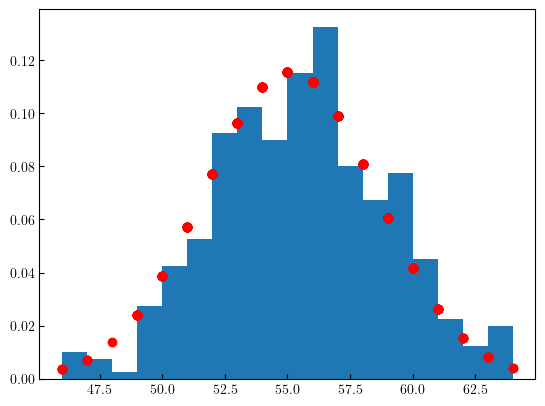

In [5]:
y_gauss = (2*np.pi*3.45**2)**-0.5 * np.exp(-(x-55.09)**2 / (2*3.44**2))

plt.hist(df['result'],bins=18,density=True)
plt.scatter(x,y_gauss,c="red")
plt.savefig("graph.pdf")

# 勾配降下法

In [261]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import IPython.display

# def gaussian(x,mu,sigma): 
#     return (2*np.pi*sigma**2)**-0.5 * np.exp(-(x-mu)**2 / (2*sigma**2))

def gaussian(x,theta): 
    mu = theta[0]
    sigma = theta[1]
    return (2*np.pi*sigma**2)**-0.5 * np.exp(-(x-mu)**2 / (2*sigma**2))

def L_func(x,theta): 
    return np.sum(-np.log(gaussian(x,theta)))

# def dv_L_func(x,theta,dv): 
#     y = L_func(x,theta)
#     a = (L_func(x,theta))


def dev(func,x,theta,dv): 
    y = func(x)
    a = (func(x+dv) - y)/dv
    b = y - a*x
    ref_x = -b/a
    return ref_x, func(ref_x)

def diff_L_func(x,theta,diff_index,dv):
    y = L_func(x,theta)
    diff_theta_0 = theta.copy()
    diff_theta_0[diff_index] += dv
    diff_theta_1 = theta.copy()
    diff_theta_1[diff_index] -= dv
    
    a = (L_func(x,diff_theta_0)-L_func(x,diff_theta_1)) / (2*dv)
    b = y - a*theta[diff_index]
    # ref_theta = -b/a
    # return ref_theta, L_func(x,ref_theta)
    return b
    
    
    



# def gaussian_likelihood(x,theta): 
#     return -len(x)/2*np.log(2*np.pi*theta[0]**2) - 1/theta[0]*np.sum(x-theta[1])

In [263]:

dv = 1e-2
theta = np.array([100,100],dtype=np.float64)
diff_theta = theta.copy()
diff_theta[0] += dv
L_func(x,theta)==L_func(x,diff_theta)
theta,diff_theta
# diff_L_func(x,theta,0,dv)
(L_func(x,theta)-L_func(x,diff_theta))/dv
diff_L_func(x,theta,0,dv)

1.79443359375

ValueError: x and y must be the same size

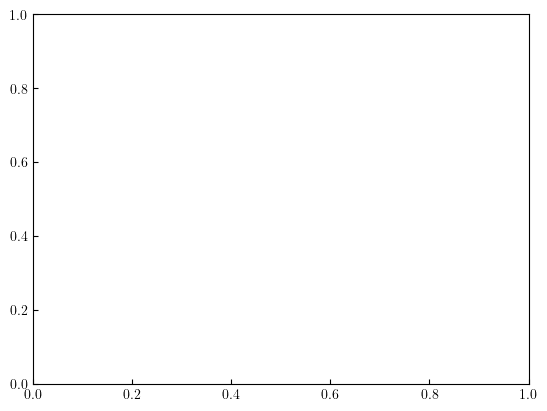

In [264]:
theta = np.array([100,100])
X = np.arange(-500,500,10)
Y = L_func(X,theta)
y = L_func(x,theta)
# y_gauss = (2*np.pi*3.45**2)**-0.5 * np.exp(-(x-55.09)**2 / (2*3.44**2))


plt.scatter(X,Y)
plt.scatter(x,y)
# plt.scatter(x,y_gauss)

In [188]:
df = pd.read_excel("st1.xlsm",usecols=(0,1))

array([0., 0.])

<Axes: >

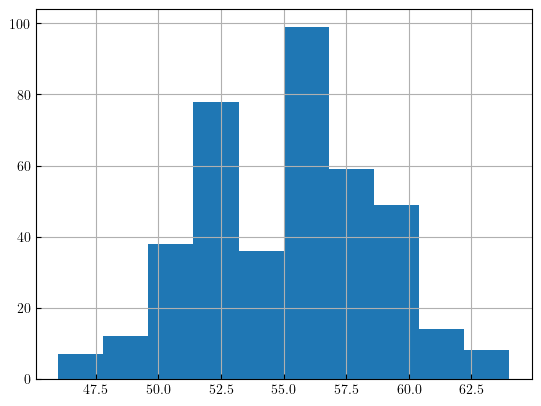

In [269]:
dv = 1e-3
theta = np.array([100,100])
x = df['result'].values.astype(np.float32)
gamma = 0.1
diff_theta = np.zeros(2)

# for i in range(10): 
#     for diff_index in range(len(theta)): 
#         _,diff_theta[diff_index] = diff_L_func(x,theta,diff_index,dv)
        
#     print(diff_theta)
    
    # theta = theta - gamma*func_E()
df['result'].hist()

# dev

In [122]:
def fx(x): 
    return x**2-3

x = 10
dv = 1e-5

for i in range(100):
    y = fx(x)
    a = (fx(x+dv) - fx(x))/dv
    b = y - a*x
    x = -b/a
    if abs(y)<1e-5: 
        break
print(abs(y),x)

2.731835646585523e-09 1.7320508075688796


In [126]:
x = 10
dv = 1e-5

for i in range(10): 
    x,y = dev(fx, x, dv)
    print(y)

23.522524976047965
5.215477505572366
0.82774889435807
0.044751963765242486
0.00016456911568552002
2.731835646585523e-09
7.993605777301127e-15
-4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16


# test

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import IPython.display


def gaussian(x,theta): 
    mu = theta[0]
    sigma = theta[1]
    return (2*np.pi*sigma**2)**-0.5 * np.exp(-(x-mu)**2 / (2*sigma**2))

def L_func(x,theta): 
    return -np.sum(np.sum(gaussian(x,theta)))

def diff_L_func(x,theta,diff_index,dv):
    y = L_func(x,theta)
    diff_theta_0 = theta.copy()
    diff_theta_0[diff_index] += dv
    diff_theta_1 = theta.copy()
    diff_theta_1[diff_index] -= dv
    
    a = (L_func(x,diff_theta_0)-L_func(x,diff_theta_1)) / (2*dv)
    return a

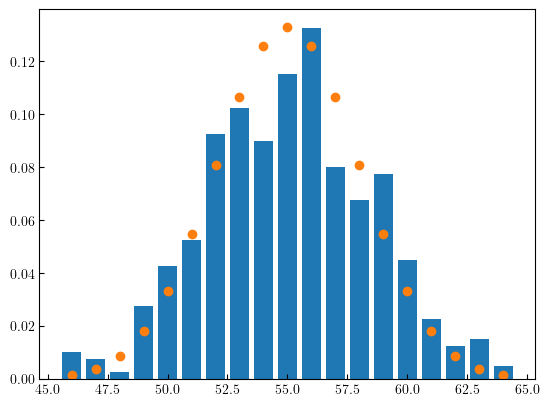

In [6]:
data = pd.read_excel("st1.xlsm",usecols=(0,1),dtype='int32')
freq = data.groupby('result',as_index=False).count()
x = freq.result.values.astype(np.int32)
y = freq.times.values.astype(np.int32)
y = y/np.sum(y)

plt.bar(x,y)
plt.scatter(x,gaussian(x,(55,3,5)))

[ -8.1539154  -35.42423248] 0
[-0.52748182  0.51444895] 100
[-2.76507706e-06  2.60769184e-07] 200
[-2.76507706e-06  2.60769184e-07] 300
[-2.76507706e-06  2.60769184e-07] 400
[-2.76507706e-06  2.60769184e-07] 500
[-2.76507706e-06  2.60769184e-07] 600
[-2.76507706e-06  2.60769184e-07] 700
[-2.76507706e-06  2.60769184e-07] 800
[-2.76507706e-06  2.60769184e-07] 900


array([54.999996,  5.477226], dtype=float32)

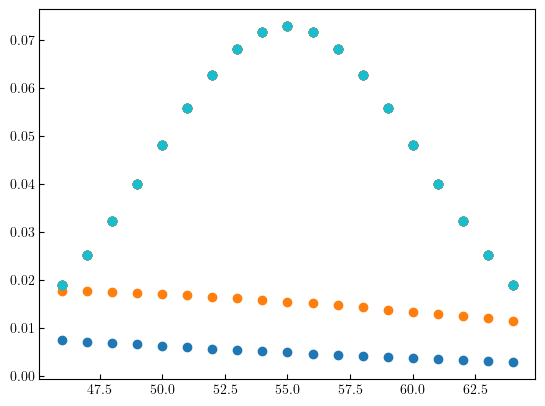

In [51]:
import numpy as np 
import matplotlib.pyplot as plt


theta = np.array([10,10],dtype=np.float32)
dv = 1e-5
epoc = 1000
diff_theta = np.zeros(2)
gamma = 0.5

for epoc in range(epoc): 
    for diff_index in range(len(theta)): 
        diff_theta[diff_index] = diff_L_func(x,theta,diff_index,dv)
        
    theta -= gamma*diff_theta

    if epoc % 100 == 0: 
        print(diff_theta,epoc)
        plt.scatter(x,gaussian(x,theta))

    # if np.all(abs(diff_theta)<1e-4):
    #     break

    # plt.scatter(epoc,theta[1])
theta

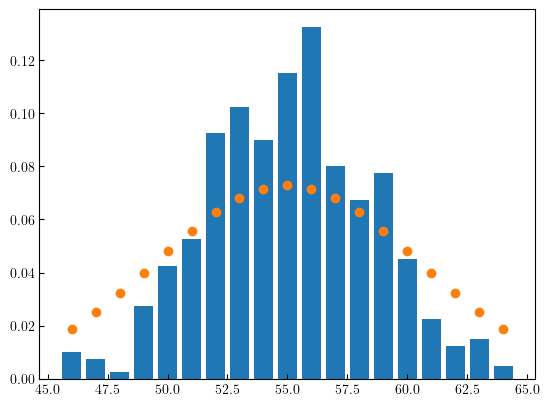

In [386]:
pred_y = gaussian(x,theta)

plt.bar(x,y)
plt.scatter(x,pred_y)

In [8]:
np.array([1,1]) < 10

array([ True,  True])

In [21]:
(diff_theta==1).all()

False

In [24]:
abs(diff_theta)

array([ 8.1539154 , 35.42423248])

In [39]:
data['result'].describe()

count    400.000000
mean      55.090000
std        3.445516
min       46.000000
25%       53.000000
50%       55.000000
75%       57.000000
max       64.000000
Name: result, dtype: float64